In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
import xgboost as xgb
from sklearn import metrics
import prettytable

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.drop("customerID", axis=1, inplace=True)



In [8]:
# 转换成连续型变量
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
# 查看是否存在缺失值
data['TotalCharges'].isnull().sum()

11

In [9]:
data.loc[data['TotalCharges'].isnull()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [10]:
data.query("tenure == 0").shape[0]

11

In [11]:
data = data.query("tenure != 0")
# 重置索引
data = data.reset_index().drop('index',axis=1)  

In [12]:
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print('-'*50)

Male      3549
Female    3483
Name: gender, dtype: int64
--------------------------------------------------
No     3639
Yes    3393
Name: Partner, dtype: int64
--------------------------------------------------
No     4933
Yes    2099
Name: Dependents, dtype: int64
--------------------------------------------------
Yes    6352
No      680
Name: PhoneService, dtype: int64
--------------------------------------------------
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
--------------------------------------------------
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
--------------------------------------------------
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
--------------------------------------------------
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBa

In [13]:
data.Churn = data.Churn.map({'No':0,'Yes':1})

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


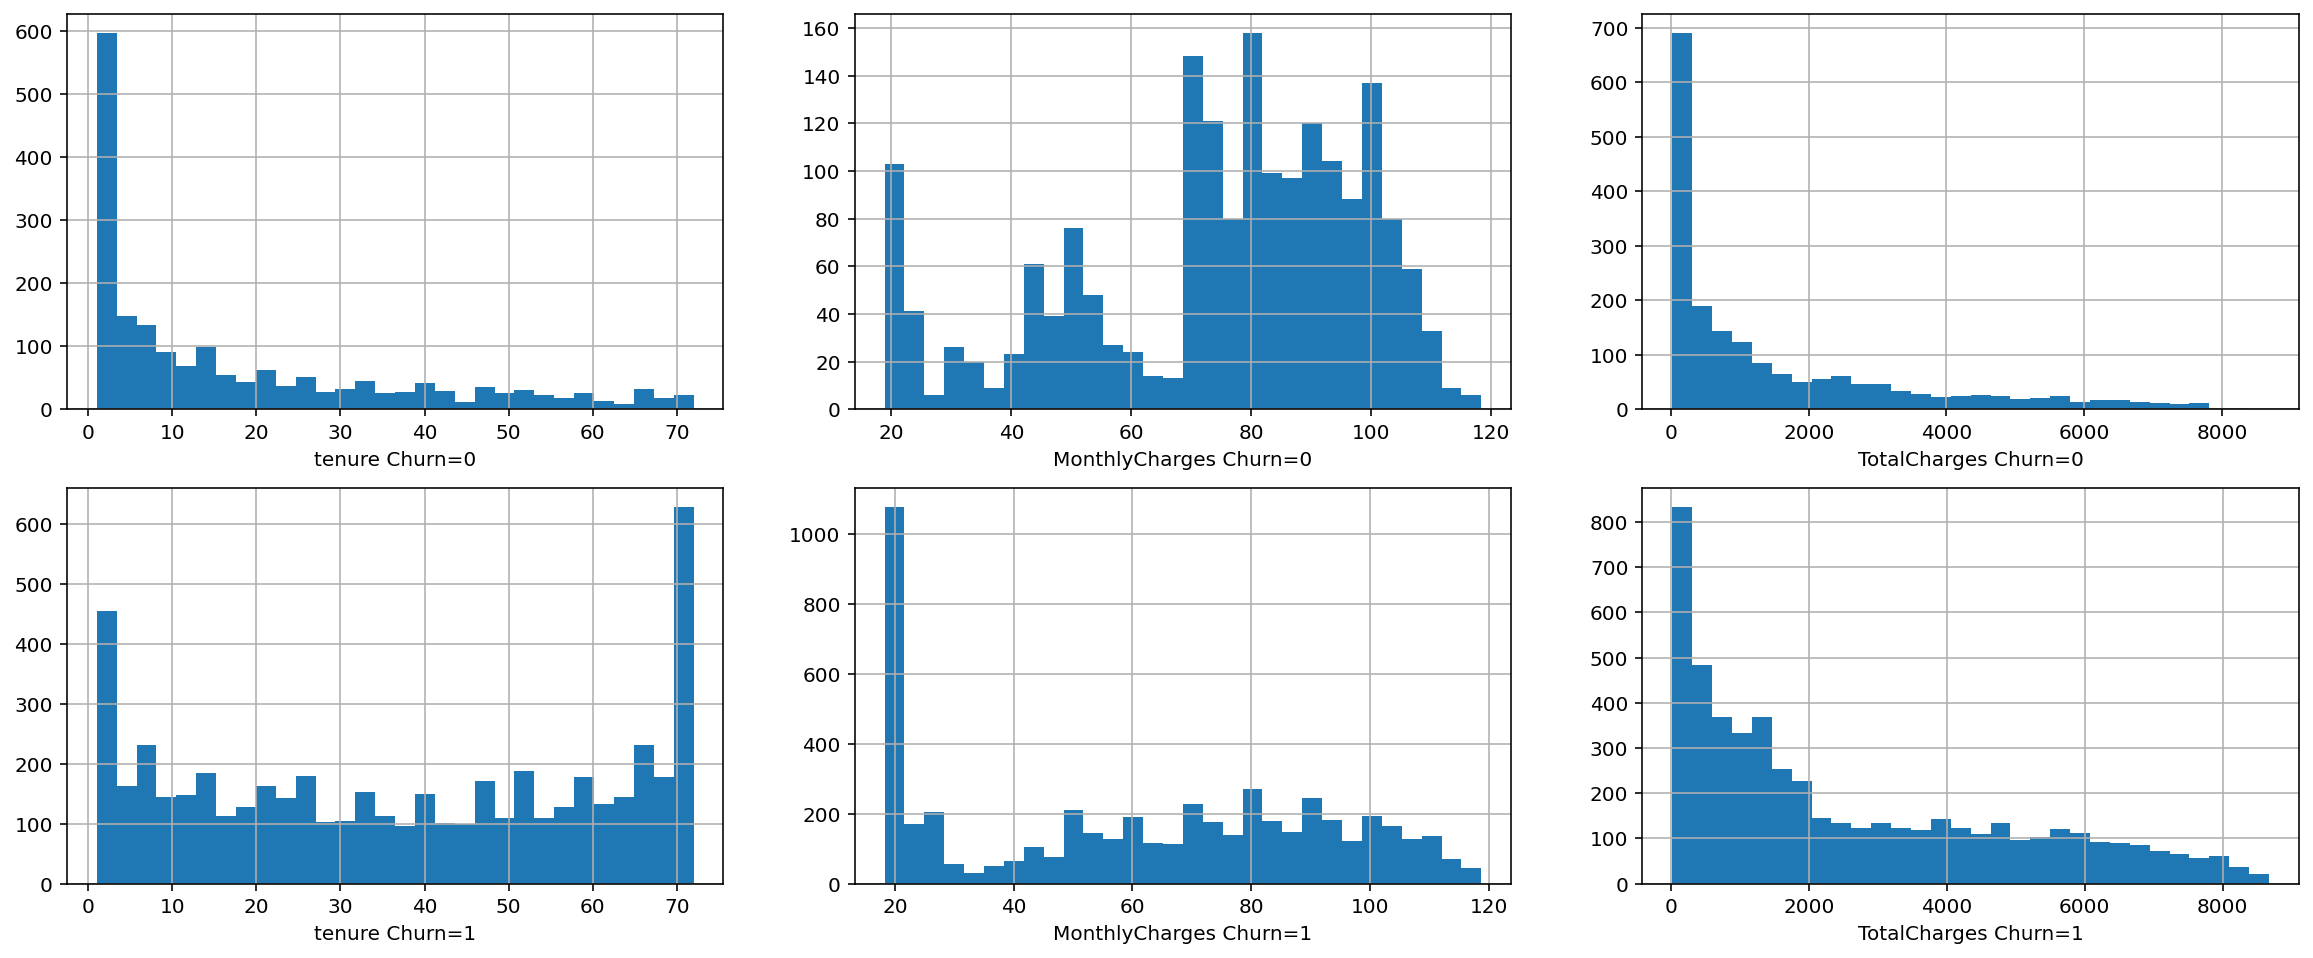

In [14]:
fig, ax= plt.subplots(nrows=2, ncols=3, figsize = (20,8))
for i, feature in enumerate(['tenure','MonthlyCharges','TotalCharges']):
    data.loc[data.Churn == 1, feature].hist(ax=ax[0][i], bins=30)
    data.loc[data.Churn == 0, feature].hist(ax=ax[1][i], bins=30, )
    ax[0][i].set_xlabel(feature+' Churn=0')
    ax[1][i].set_xlabel(feature+' Churn=1')

In [15]:
data['TotalCharges_diff'] = data.tenure * data.MonthlyCharges - data.TotalCharges

def func(x):
    if x > 0:
        res = 2  # 2表示月费增加
    elif x == 0: 
        res = 1  # 1表示月费持平
    else:
        res = 0  # 0表示月费减少
    return res
data['TotalCharges_diff1'] = data['TotalCharges_diff'].apply(lambda x:func(x))
data.drop('TotalCharges_diff', axis=1, inplace=True)

In [16]:
data['tenure'] = pd.qcut(data['tenure'], q=5, labels=['tenure_'+str(i) for i in range(1,6)])
data['MonthlyCharges'] = pd.qcut(data['MonthlyCharges'], q=5, labels=['MonthlyCharges_'+str(i) for i in range(1,6)])
data['TotalCharges'], _ = stats.boxcox(data['TotalCharges'])

In [17]:
X = data[data.columns.drop('Churn')]
y = data.Churn

# 生成哑变量
X = pd.get_dummies(X)

# 标准化
scaler = StandardScaler() 
scale_data = scaler.fit_transform(X)  
X = pd.DataFrame(scale_data, columns = X.columns)

y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [18]:
model_smote = SMOTE(random_state=10)  # 建立SMOTE模型对象
X_smote, y_smote = model_smote.fit_resample(X, y)  


y_smote.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [19]:
X_smote.shape[1]

54

In [20]:
etc = ExtraTreesClassifier(random_state=9)  # ExtraTree，用于EFE的模型对象
selector = RFE(etc, n_features_to_select=30)
selected_data = selector.fit_transform(X_smote, y_smote)  # 训练并转换数据
X_smote = pd.DataFrame(selected_data, columns = X_smote.columns[selector.get_support()])

# 2.4 建模

In [25]:
# 划分训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, stratify=y_smote, random_state=11)

In [26]:
# 交叉验证输出f1得分
def score_cv(model, X, y):
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    f1= cross_val_score(model, X, y, scoring='f1', cv=kfold).mean()
    return f1

In [27]:
# 网格搜索
def gridsearch_cv(model, test_param, cv=5):
    gsearch = GridSearchCV(estimator=model, param_grid=test_param, scoring='f1', n_jobs=-1, cv=cv)
    gsearch.fit(X_train, y_train)
    print('Best Params: ', gsearch.best_params_)
    print('Best Score: ', gsearch.best_score_)
    return gsearch.best_params_

In [29]:
# 输出预测结果及混淆矩阵等相关指标
def model_pred(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('test f1-score: ', metrics.f1_score(y_test, pred))
    print('-'*50)
    print('classification_report \n',metrics.classification_report(y_test, pred))
    print('-'*50)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # 获得混淆矩阵
    confusion_matrix_table = prettytable.PrettyTable(['','actual-1','actual-0'])  # 创建表格实例
    confusion_matrix_table.add_row(['prediction-1',tp,fp])  # 增加第一行数据
    confusion_matrix_table.add_row(['prediction-0',fn,tn])  # 增加第二行数据
    print('confusion matrix \n',confusion_matrix_table)

# 2.4.1 逻辑斯蒂回归

In [42]:
#使用默认参数训练

lr = LogisticRegression(random_state=10)
lr_f1 = score_cv(lr, X_train, y_train)
lr_f1

0.7858476629776509

In [43]:
model_pred(lr)

test f1-score:  0.7856332703213611
--------------------------------------------------
classification_report 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1291
           1       0.77      0.80      0.79      1291

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582

--------------------------------------------------
confusion matrix 
 +--------------+----------+----------+
|              | actual-1 | actual-0 |
+--------------+----------+----------+
| prediction-1 |   1039   |   315    |
| prediction-0 |   252    |   976    |
+--------------+----------+----------+


In [44]:
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [10, 100, 500],
    'penalty': ['l1','l2'],
    }
lr_best_params = gridsearch_cv(lr, lr_params)

Best Params:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
Best Score:  0.787344047255344


In [45]:
%%time
lr_params1 = {'C': [0.001, 0.01, 0.05, 0.1],
              'max_iter': [10, 30, 60, 100],
              'penalty': ['l2'],
             }

lr_best_params = gridsearch_cv(lr, lr_params1)

Best Params:  {'C': 0.01, 'max_iter': 30, 'penalty': 'l2'}
Best Score:  0.787344047255344
CPU times: user 8.38 s, sys: 6.13 s, total: 14.5 s
Wall time: 15.2 s


In [46]:
# 查看调参后的测试集效果

lr_best = LogisticRegression(**lr_best_params, random_state=10)
model_pred(lr_best)

test f1-score:  0.7863312054074352
--------------------------------------------------
classification_report 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1291
           1       0.76      0.81      0.79      1291

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582

--------------------------------------------------
confusion matrix 
 +--------------+----------+----------+
|              | actual-1 | actual-0 |
+--------------+----------+----------+
| prediction-1 |   1047   |   325    |
| prediction-0 |   244    |   966    |
+--------------+----------+----------+


# 2.4.2 SVC

In [30]:
svc = SVC(random_state=12, probability=True)  # probability默认为False,为True时会输出概率，但是速度会变慢
svc_f1 = score_cv(svc, X_train, y_train)
svc_f1

0.8316116213986324

In [31]:
model_pred(svc)

test f1-score:  0.8303469309950439
--------------------------------------------------
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1291
           1       0.82      0.84      0.83      1291

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582

--------------------------------------------------
confusion matrix 
 +--------------+----------+----------+
|              | actual-1 | actual-0 |
+--------------+----------+----------+
| prediction-1 |   1089   |   243    |
| prediction-0 |   202    |   1048   |
+--------------+----------+----------+


In [49]:
# SVM的调参开销较大，所以先从核函数的选择开始

import time

for kernel in ["linear","poly","rbf","sigmoid"]:
    time_start = time.time()
    model = SVC(kernel = kernel,
              gamma="auto",
             )
    f1 = score_cv(model, X_train, y_train)
    time_end = time.time()
    print("{} test f1-score: {:.6f}, cost time: {:.6f}s ".format(kernel, f1, time_end-time_start))

linear test f1-score: 0.784037, cost time: 18.626908s 


poly test f1-score: 0.800826, cost time: 8.918169s 


rbf test f1-score: 0.831748, cost time: 8.476216s 


sigmoid test f1-score: 0.691233, cost time: 10.688259s 


In [41]:
# 高斯核的f1交叉验证得分较高，所以选择高斯核进行接下来的调参
# %%time
svc_params = {
    "kernel":['rbf'],
    "C":[0.1, 1, 10, 50], 
    "gamma": [1, 0.1, 0.01]
}
svc_best_params = gridsearch_cv(svc, svc_params)

Best Params:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.8593453490921974


In [39]:
# 缩小范围继续微调
#time
svc_params2 = {
    "kernel":['rbf'],
    "C":[1, 5, 10, 25, 50], 
    "gamma": [0.5, 0.1, 0.05]
}
svc_best_params = gridsearch_cv(svc, svc_params2)

Best Params:  {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.8611203019795741


In [42]:
# 有一定的提升，再次缩小范围
#%%time
svc_params2 = {
    "kernel":['rbf'],
    "C":[1, 3, 5, 7, 10], 
    "gamma": [0.5, 0.1, 0.05]
}
svc_best_params = gridsearch_cv(svc, svc_params2)

Best Params:  {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.8611203019795741


In [40]:
# 最佳参数没有发生变化，停止调参
# 通过网格调参可见SVC f1得分有了一定的提高，查看其测试集的效果如何
svc_best = SVC(**svc_best_params, probability=True, random_state=10)
model_pred(svc_best)

test f1-score:  0.8702742772424017
--------------------------------------------------
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1291
           1       0.83      0.91      0.87      1291

    accuracy                           0.86      2582
   macro avg       0.87      0.86      0.86      2582
weighted avg       0.87      0.86      0.86      2582

--------------------------------------------------
confusion matrix 
 +--------------+----------+----------+
|              | actual-1 | actual-0 |
+--------------+----------+----------+
| prediction-1 |   1174   |   233    |
| prediction-0 |   117    |   1058   |
+--------------+----------+----------+


# 2.4.3 随机森林

In [53]:
rfc = RandomForestClassifier(random_state=11)
rfc_f1 = score_cv(rfc, X_train, y_train)
rfc_f1

0.8338731462911035

In [54]:
model_pred(rfc)

test f1-score:  0.8288643533123029
--------------------------------------------------
classification_report 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1291
           1       0.84      0.81      0.83      1291

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582

--------------------------------------------------
confusion matrix 
 +--------------+----------+----------+
|              | actual-1 | actual-0 |
+--------------+----------+----------+
| prediction-1 |   1051   |   194    |
| prediction-0 |   240    |   1097   |
+--------------+----------+----------+


In [55]:
# 查看特征重要性
rfc.fit(X_train, y_train)
feature_importance= (pd.DataFrame({'feature': X_train.columns,
                                   'feature_importance': rfc.feature_importances_})
                       .sort_values('feature_importance', ascending=False)
                       .round(4))

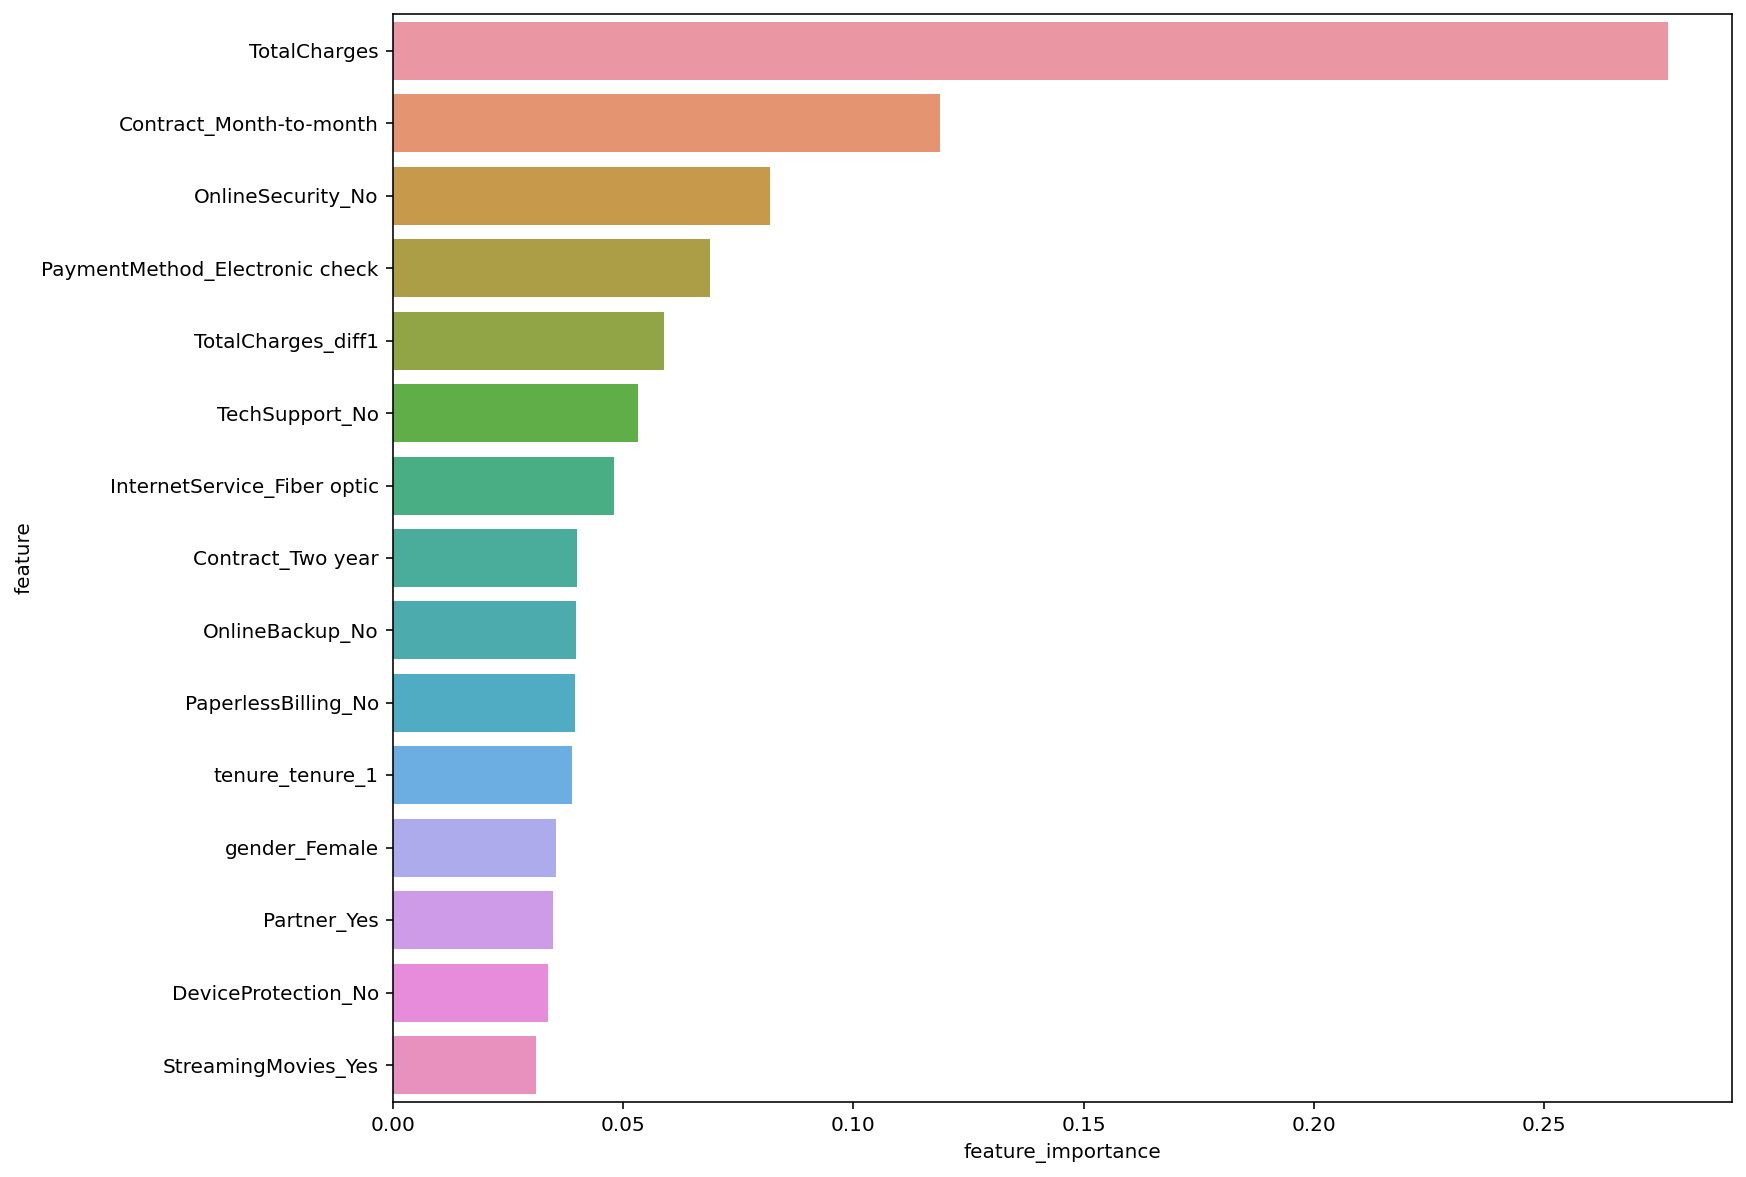

In [56]:
# 绘制barh图查看特征重要性排序
plt.figure(figsize=(12, 10))
sns.barplot(x='feature_importance', y='feature', data=feature_importance)
plt.show()

best n_estimators is 370, best f1-score is 0.8369555513988509


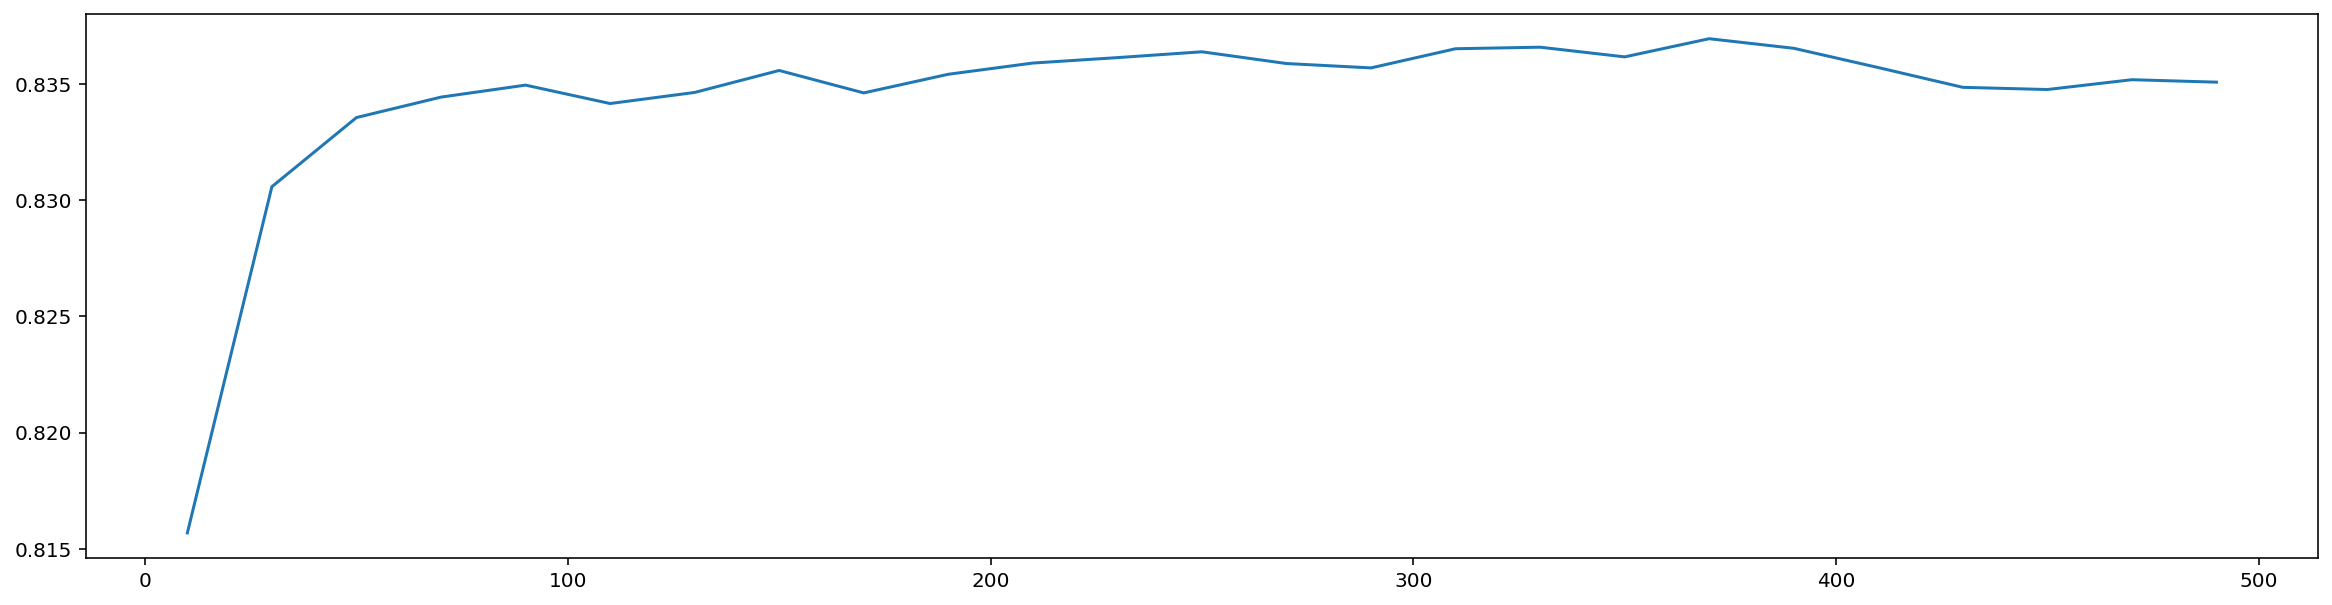

CPU times: user 2min 57s, sys: 793 ms, total: 2min 58s
Wall time: 3min 10s


In [57]:
# 先调整n_estimators
%%time
score_list = []
n_estimators_range = range(10,501,20)
for i in n_estimators_range:
    rfc_model = RandomForestClassifier(n_estimators=i, 
#                                  min_samples_split=20,
#                                  min_samples_leaf=20,
#                                  max_depth=8,
#                                  max_features='sqrt',
                                 random_state=10
                                )
    score = score_cv(rfc_model, X_train, y_train)
    score_list.append(score)
score_df = pd.DataFrame(score_list, index = n_estimators_range)
best_score = score_df.max()[0]
best_n_estimators = score_df.idxmax()[0]
print("best n_estimators is {}, best f1-score is {}".format(best_n_estimators, best_score))
plt.figure(figsize=[20,5])
plt.plot(n_estimators_range, score_list)
plt.show()

In [0]:
# 可见n_estimators在200以上时，模型表现已趋于稳定了
# 缩小范围

%%time
score_list1 = []
n_estimators_range1 = range(330, 370, 2)
for i in n_estimators_range1:
    rfc_model = RandomForestClassifier(n_estimators=i, 
                                 random_state=10
                                )
    score = score_cv(rfc_model, X_train, y_train)
    score_list1.append(score)
score_df1 = pd.DataFrame(score_list1, index = n_estimators_range1)
best_score1 = score_df1.max()[0]
best_n_estimators1 = score_df1.idxmax()[0]
print("best n_estimators is {}, best f1-score is {}".format(best_n_estimators1, best_score1))
plt.figure(figsize=[20,5])
plt.plot(n_estimators_range1, score_list1)
plt.show()  

In [0]:
# 可见n_estimators=352时，f1得分最高
# 调整max_depth
%%time
rfc_params = {
    'n_estimators':[352],
    'max_depth':np.arange(2, 30, 1)
}

rfc_best_params = gridsearch_cv(rfc, rfc_params)

In [0]:
# 有提升
# 调整max_features
%%time
rfc_params1 = {
    'n_estimators':[352],
    'max_depth':[14],
    'max_features':np.arange(2, 30, 1)
}

rfc_best_params = gridsearch_cv(rfc, rfc_params1)

In [0]:
# 有轻微提升
# 调整min_samples_leaf
%%time

rfc_params2 = {
    'n_estimators':[352],
    'max_depth':[14],
    'max_features':[3],
    'min_samples_leaf':np.arange(1, 11, 1)
}

In [0]:
# 没有提升，这里就不再尝试了
# 查看调参之后的测试集效果
rfc_best = RandomForestClassifier(**rfc_best_params)
model_pred(rfc_best) 

# 2.4.4 XGBoost

In [0]:
xgbc = xgb.XGBClassifier(random_state=10)
xgbc_f1 = score_cv(xgbc, X_train, y_train)
xgbc_f1 

In [0]:
model_pred(xgbc)

In [0]:
# 使用模型自带的cv进行调参n_estimators

def model_cv(model, X, y, cv_folds=5, early_stopping_rounds=50, seed=0):
    xgb_param = model.get_xgb_params()
    xgtrain = xgb.DMatrix(X, label=y)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
                    metrics='auc', seed=seed, callbacks=[
            xgb.callback.print_evaluation(show_stdv=False),
            xgb.callback.early_stop(early_stopping_rounds)
       ])
    num_round_best = cvresult.shape[0] - 1
    print('Best round num: ', num_round_best)
    return num_round_best

In [0]:
# 设置初始参数
xgbc_params = {
    'n_estimators':5000,
    'seed':0,
    'max_depth':3,
    'min_child_weight':7,
    'gamma':0,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'scale_pos_weight':1,
    'reg_alpha':1,
    'reg_lambda': 1e-5,
    'learning_rate': 0.1,
    'objective':'binary:logistic',
}

xgbc_model = xgb.XGBClassifier(**xgbc_params)
num_round = model_cv(xgbc_model, X_train, y_train)

In [0]:
# 由于自带的交叉验证没有f1得分，需要自定义，所以使用auc得分来选择最佳树的数量
# 调参max_depth 和 min_child_weight

%%time
xgbc_param1 = {
    'n_estimators':[181],
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 10, 2)
}
xgbc_best_params = gridsearch_cv(xgbc, xgbc_param1) 

In [0]:
# 有较大的提升
# 缩小范围
%%time
xgbc_param2 = {
    'n_estimators':[181],
    'max_depth': range(2, 5, 1),
    'min_child_weight': range(4, 7, 1)
}
xgbc_best_params = gridsearch_cv(xgbc, xgbc_param2)

In [0]:
# 有小幅提升
# 接下来调整 gamma

%%time
xgbc_param3 = {
    'n_estimators':[181],
    'max_depth': [2],
    'min_child_weight': [5],
    'gamma':[0, 0.1, 1, 10]
}
xgbc_best_params = gridsearch_cv(xgbc, xgbc_param3)

In [0]:
# 没有变化
# subsample与colsample_bytree

xgbc_param4 = {
    'n_estimators':[181],
    'max_depth': [2],
    'min_child_weight': [5],
    'subsample': np.linspace(0.6, 1, 9),
    'colsample_bytree': np.linspace(0.6, 1, 9)
}
xgbc_best_params = gridsearch_cv(xgbc, xgbc_param4)


In [0]:
# 有一点点提升
# reg_alpha与reg_lambda

%%time
xgbc_param5 = {
    'n_estimators':[181],
    'max_depth': [2],
    'min_child_weight': [5],
    'subsample': [1],
    'colsample_bytree': [0.85],
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100, 1000],
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100, 1000]
}

In [0]:
xgbc_best = xgb.XGBClassifier(**xgbc_best_params, random_state=10)
model_pred(xgbc_best)
